In [2]:
import pandas as pd

10x_cell_metadata_with_group_membership.csv

UMAP20230507-HY-GABA.csv

auta ta dyo katevassa apo to aws

https://allen-brain-cell-atlas.s3.us-west-2.amazonaws.com/index.html#metadata/WMB-neighborhoods/20230630/views/

In [3]:
umap = pd.read_csv('hy_gaba_umap.csv')
meta = pd.read_csv('10x_metadata.csv')

print('UMAP columns:', umap.columns.tolist())
print('Metadata columns:', meta.columns.tolist())



/var/folders/r9/np9wqr6j6w311f_z847z1pzh0000gn/T/ipykernel_61901/3113151135.py:2: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  meta = pd.read_csv('10x_metadata.csv')


UMAP columns: ['cell_label', 'x', 'y']
Metadata columns: ['cell_label', 'library_label', 'anatomical_division_label', 'cluster_alias', 'library_method', 'region_of_interest_acronym', 'donor_label', 'donor_genotype', 'donor_sex', 'dataset_label', 'matrix_label', 'x', 'y', 'neurotransmitter', 'division', 'class', 'subclass', 'supertype', 'cluster', 'neurotransmitter_color', 'division_color', 'class_color', 'subclass_color', 'supertype_color', 'cluster_color', 'region_of_interest_order', 'region_of_interest_color', 'CNU-HYa-GABA', 'CTX-CGE-MGE-GABA', 'HY-EA', 'HY-EA-Glut', 'HY-GABA', 'IT-ET-Glut', 'MB', 'MB-HB-CB', 'MB-HB-CB-GABA', 'MB-HB-CB-Glut', 'MB-PONS', 'NN-IMN-GC', 'NP-CT-L6b-Glut', 'Other-Sub-GABA', 'Pallium-Glut', 'Subpallium-GABA', 'TH-EPI-Glut', 'WholeBrain']


In [4]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

merged = pd.merge(umap, meta, on='cell_label', how='inner')

#extract UMAP coords and cluster labels
X = merged[['x_x', 'y_x']].values #umap coords, column names suffix after merge
labels = merged['cluster'].values #clustering labels

#compute metrics
print('Silhouette score:', silhouette_score(X, labels))
print('CH Index:', calinski_harabasz_score(X, labels))
print("DB Score:", davies_bouldin_score(X, labels))

Silhouette score: 0.017957850500281175
CH Index: 6788.438237868254
DB Score: 4.441436145544523


In [7]:
import numpy as np

print("Num of unique clusters:", len(np.unique(labels)))
print("Cluster sizes:", np.unique(labels, return_counts=True))

Num of unique clusters: 420
Cluster sizes: (array(['1221 PVa-ARH Six3 Dopa-Gaba_1', '1222 PVa-ARH Six3 Dopa-Gaba_1',
       '1223 PVa-ARH Six3 Dopa-Gaba_1', '1224 PVa-ARH Six3 Dopa-Gaba_2',
       '1225 PMv-TMv Tbx3 Hist-Gaba_1', '1226 PMv-TMv Tbx3 Hist-Gaba_1',
       '1227 PMv-TMv Tbx3 Hist-Gaba_1', '1228 PMv-TMv Tbx3 Hist-Gaba_1',
       '1229 PMv-TMv Tbx3 Hist-Gaba_1', '1230 PMv-TMv Tbx3 Hist-Gaba_2',
       '1231 PMv-TMv Tbx3 Hist-Gaba_2', '1252 RT ZI Gnb3 Gaba_1',
       '1253 RT ZI Gnb3 Gaba_1', '1254 RT ZI Gnb3 Gaba_1',
       '1255 RT ZI Gnb3 Gaba_1', '1256 RT ZI Gnb3 Gaba_1',
       '1257 RT ZI Gnb3 Gaba_1', '1258 RT ZI Gnb3 Gaba_2',
       '1259 RT ZI Gnb3 Gaba_2', '1260 RT ZI Gnb3 Gaba_2',
       '1261 RT ZI Gnb3 Gaba_2', '1262 RT ZI Gnb3 Gaba_2',
       '1263 RT ZI Gnb3 Gaba_3', '1264 RT ZI Gnb3 Gaba_3',
       '1265 RT ZI Gnb3 Gaba_3', '1266 RT ZI Gnb3 Gaba_3',
       '1267 RT ZI Gnb3 Gaba_4', '1268 RT ZI Gnb3 Gaba_4',
       '1269 RT ZI Gnb3 Gaba_4', '1270 RT ZI Gnb3 Gab

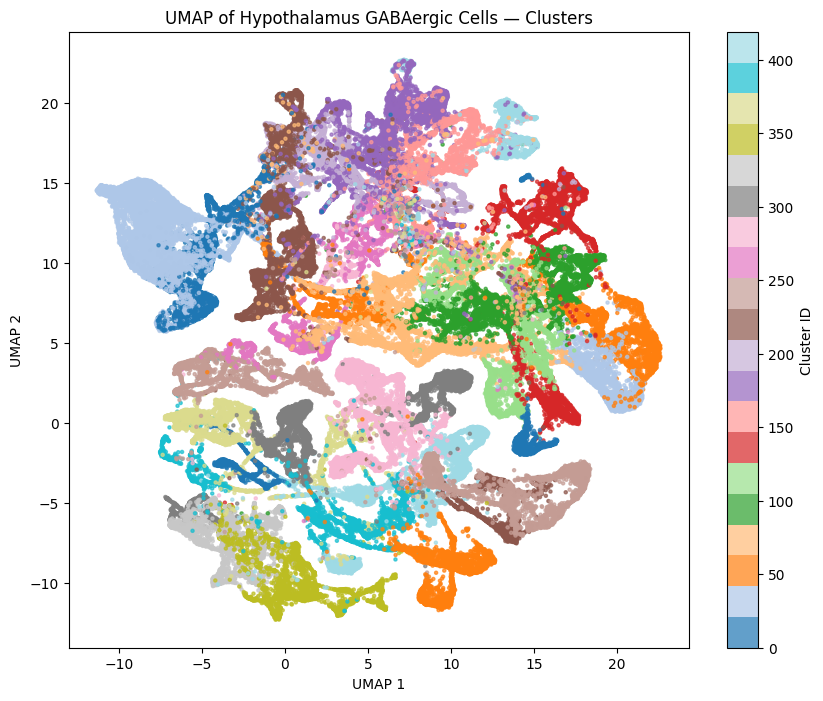

In [ ]:
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Encode cluster labels to integers
le = LabelEncoder()
encoded_labels = le.fit_transform(labels)  # labels = merged['cluster']

# UMAP
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X[:, 0], X[:, 1], c=encoded_labels, cmap="tab20", s=5, alpha=0.7)
plt.title("UMAP of Hypothalamus GABAergic Cells — Clusters")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.colorbar(scatter, label="Cluster ID")
plt.show()


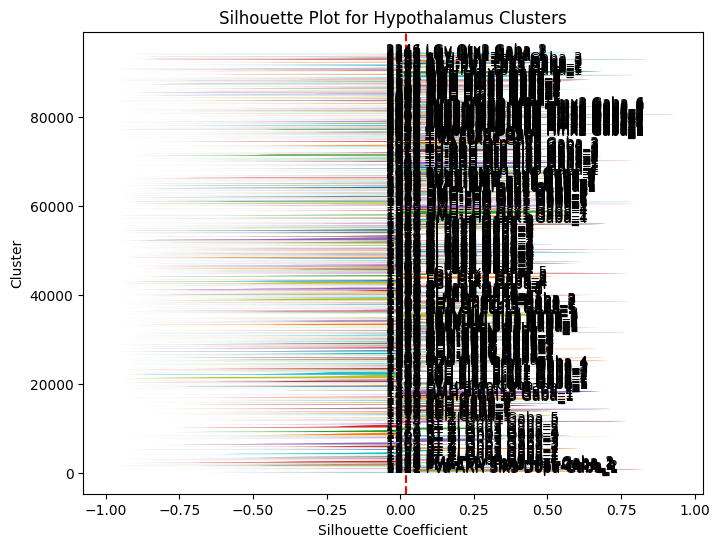

In [9]:
from sklearn.metrics import silhouette_samples
import numpy as np

sil_vals = silhouette_samples(X, labels)
y_lower = 10
plt.figure(figsize=(8, 6))
for i, label in enumerate(np.unique(labels)):
    sil_cluster_vals = sil_vals[labels == label]
    sil_cluster_vals.sort()
    y_upper = y_lower + len(sil_cluster_vals)
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, sil_cluster_vals)
    plt.text(-0.05, y_lower + 0.5 * len(sil_cluster_vals), str(label))
    y_lower = y_upper + 10
plt.axvline(np.mean(sil_vals), color="red", linestyle="--")
plt.title("Silhouette Plot for Hypothalamus Clusters")
plt.xlabel("Silhouette Coefficient")
plt.ylabel("Cluster")
plt.show()


checked hypothalamic gaba cells using cluster column

done on umap coords
ta skor einai psiloxalia den kserw giati

kane ena cross check to num of cluster labels me to ti lene sto paper

mporei na ginei kai gia supertype, subclass,class

allazeis to merged me merged['supertype'] p.x.